# **Loan Default Prediction**

----------------------------------------
## **Context and Objective**
----------------------------------------

- It is very critical to be able to identify the loan defaults in the financial domain. Given a set of features about a person, the goal is to predict if the person will default or not.
- In this notebook, we are going to cover the concepts of LVC 3 and try to create a model that predicts if a particular person will default or not.

--------------------
## **Dataset**
--------------------

The dataset used has the below features:

- **Default** - Yes/No, categorical dependent variable suggesting the state of default.
- **Student** - Yes/No, categorical independent variable depicting if the applicant is a student or not.
- **Balance** - The account balance of the applicant.
- **Income** - The income of the applicant.

## **Importing the libraries and overview of the dataset**

In [1]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings('ignore') # To get rid of warning messages

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Update default background style of plots
sns.set_style(style = 'darkgrid')

# Importing sklearn LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Importing LogisticReggression
from sklearn.linear_model import LogisticRegression

# Importing K-Nearest Neighbors (K-NN)
from sklearn.neighbors import KNeighborsClassifier

# Importing model selection tools
from sklearn.model_selection import train_test_split

# Let us now scale the features
from sklearn.preprocessing import StandardScaler


### **Loading the data**

In [2]:
# Let us import the files
df = pd.read_csv('data/Default.csv', index_col=0)

In [3]:
df.head()

,default,student,balance,income
1,No,No,729.53,"44,361.63"
2,No,Yes,817.18,"12,106.13"
3,No,No,"1,073.55","31,767.14"
4,No,No,529.25,"35,704.49"
5,No,No,785.66,"38,463.50"


### **Encoding categorical variables**

In [4]:
# Let us define a dictionary to replace the Yes/No with numerical values 1 and 0
encoding_dict = {'Yes': 1, 'No': 0}

In [5]:
# Encoding the features
df['default'] = df['default'].map(encoding_dict)
df['student'] = df['student'].map(encoding_dict)

In [6]:
df.head()

,default,student,balance,income
1,0,0,729.53,"44,361.63"
2,0,1,817.18,"12,106.13"
3,0,0,"1,073.55","31,767.14"
4,0,0,529.25,"35,704.49"
5,0,0,785.66,"38,463.50"


Let's check what is the percentage of defaulters and non-defaulters in the data.

In [7]:
df['default'].value_counts(normalize = True)*100

0   96.67
1    3.33
Name: default, dtype: float64

- Only 3.33% of data points represent the class Default.

Let us also have a look at the info of the data.

### **Checking the info of the data**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int64  
 1   student  10000 non-null  int64  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 390.6 KB


- There do not seem to be any missing values. Let us get straight to the modeling.

## **Linear Discriminant Analysis**

In [9]:
# Using only one feature - balance
balance = df.balance.values.reshape(len(df['balance']), 1)
default = df.default.values.reshape(len(df['default']), 1)
student = df.student.values.reshape(len(df['student']), 1)
income = df.income.values.reshape(len(df['income']), 1)

features = ['balance', 'student', 'income']

In [10]:
for f in features:
    X, y = df[f].values.reshape(-1, 1), df['default']
    # Fitting a LDA model
    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)
    lda_error_rate = (1 - lda.score(balance, default))*100

    # Fitting a QDA model
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X, y)
    qda_error_rate = (1 - qda.score(balance, default))*100

    print(f"LDA error rate while using only {f} as a feature is {np.round(lda_error_rate, 2)}% ")
    print(f"QDA error rate while using only {f} as a feature is {np.round(qda_error_rate, 2)}%")
    print()

LDA error rate while using only balance as a feature is 2.81% 
QDA error rate while using only balance as a feature is 2.74%

LDA error rate while using only student as a feature is 91.44% 
QDA error rate while using only student as a feature is 91.58%

LDA error rate while using only income as a feature is 3.33% 
QDA error rate while using only income as a feature is 3.33%



In [11]:
# Let us now use all the features
lda.fit(df[features], df['default'])
qda.fit(df[features], df['default'])

new_lda_error_rate = (1 - lda.score(df[features], df['default']))*100
new_qda_error_rate = (1 - qda.score(df[features], df['default']))*100

print(f"LDA error rate using all the features is {np.round(new_lda_error_rate, 2)}% ")
print(f"QDA error rate using all the features is {np.round(new_qda_error_rate, 2)}%")

LDA error rate using all the features is 2.76% 
QDA error rate using all the features is 2.7%


**Observation:**

- We observe that by using all the features to predict default, the error rate has reduced.

## **Logistic Regression**

In [12]:
for f in features[-1::-1]:
    X, y = df[f].values.reshape(-1, 1), df['default']
    lr = LogisticRegression(penalty=None, max_iter = 100)
    lr.fit(X, y)

    lr_error_rate = (1 - lr.score(balance, df['default']))*100
    print(f"Logistic Regression error rate using {f} feature is {np.round(lr_error_rate, 2)}% ")

Logistic Regression error rate using income feature is 3.33% 
Logistic Regression error rate using student feature is 91.44% 
Logistic Regression error rate using balance feature is 2.75% 


In [13]:
# Last one balance
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': None,
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [14]:
# Trying again with all the features
lrm = LogisticRegression(penalty=None)
lrm.fit(df[features], df['default'])
lr_error_rate = (1 - lrm.score(df[features], df['default']))*100

lrm_r = LogisticRegression(penalty='l1', solver='liblinear')
lrm_r.fit(df[features], df['default'])
lrm_r_error_rate = (1 - lrm_r.score(df[features], df['default']))*100

lrm_2 = LogisticRegression(penalty='l2', solver='liblinear')
lrm_2.fit(df[features], df['default'])
lrm_2_error_rate = (1 - lrm_2.score(df[features], df['default']))*100

print(f"Logistic Regression error rate using all the features is {np.round(lr_error_rate, 2)}% ")
print(f"Logistic Regression error rate using absolute value (Lasso) regularization is {np.round(lrm_r_error_rate, 2)}% ")
print(f"Logistic Regression error rate using absolute value (Ridge) regularization is {np.round(lrm_2_error_rate, 2)}% ")

Logistic Regression error rate using all the features is 3.28% 
Logistic Regression error rate using absolute value (Lasso) regularization is 2.66% 
Logistic Regression error rate using absolute value (Ridge) regularization is 3.36% 


**Observations:**

- We calculated the error rates for LDA, QDA, and Logistic Regression.
- The hyperparameter - 'multi_class' takes care of the multiclass classification.
- To evaluate the model and to check how well it performs on unseen data, always take a validation set out and check the performance of the model on the same.
- Let us now move to K-NN, where we demonstrate the validation set performance check.

## **K-Nearest Neighbors (K-NN)**

In [15]:
# We need to scalate our data
ss = StandardScaler()

**NOTE**: The following code might take a few minutes to run depending on the system's configuration.

In [16]:
# We select the best value of k for which the error rate is the least in the validation data
# Let us loop over a few values of k to determine the best k 

train_error = []
test_error = []
knn_many_split = {}
error_df_knn = pd.DataFrame()

for k in range(1, 16):
    train_error = []
    test_error = []
    lista = []
    knn = KNeighborsClassifier(n_neighbors = k)

    for i in range(100):
        x_train, x_test, y_train, y_test = train_test_split(df[features], df['default'], test_size = 0.20)

        # Let us scale the data. Notice the scaling done here.
        x_train = ss.fit_transform(x_train)
        x_test = ss.transform(x_test)
        
        # Fitting the K-NN model
        knn.fit(x_train, y_train)
        
        # Finding train and test errors
        train_error.append(1 - knn.score(x_train, y_train)) 
        test_error.append(1 - knn.score(x_test, y_test))
    
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))
    knn_many_split[k] = lista
    print(f'n_neighbors {k:>3} → Avg Train Error: {np.round(lista[0],4):>8}, Avg Test Error: {np.round(lista[1],4):>8}')

knn_many_split

n_neighbors   1 → Avg Train Error:      0.0, Avg Test Error:   0.0421
n_neighbors   2 → Avg Train Error:   0.0218, Avg Test Error:   0.0333
n_neighbors   3 → Avg Train Error:   0.0222, Avg Test Error:   0.0338
n_neighbors   4 → Avg Train Error:   0.0249, Avg Test Error:   0.0307
n_neighbors   5 → Avg Train Error:   0.0248, Avg Test Error:   0.0306
n_neighbors   6 → Avg Train Error:   0.0255, Avg Test Error:   0.0285
n_neighbors   7 → Avg Train Error:   0.0249, Avg Test Error:   0.0293
n_neighbors   8 → Avg Train Error:   0.0255, Avg Test Error:   0.0287
n_neighbors   9 → Avg Train Error:   0.0255, Avg Test Error:   0.0289
n_neighbors  10 → Avg Train Error:   0.0261, Avg Test Error:   0.0274
n_neighbors  11 → Avg Train Error:    0.026, Avg Test Error:   0.0279
n_neighbors  12 → Avg Train Error:   0.0262, Avg Test Error:    0.028
n_neighbors  13 → Avg Train Error:   0.0259, Avg Test Error:   0.0278
n_neighbors  14 → Avg Train Error:   0.0265, Avg Test Error:   0.0279
n_neighbors  15 → Av

{1: [0.0, 0.04214999999999999],
 2: [0.021848749999999983, 0.03325500000000001],
 3: [0.022208750000000003, 0.033765],
 4: [0.024899999999999988, 0.030674999999999997],
 5: [0.024811249999999986, 0.030549999999999997],
 6: [0.02545750000000001, 0.02853500000000001],
 7: [0.024927500000000002, 0.029309999999999975],
 8: [0.025528750000000003, 0.028669999999999984],
 9: [0.025506249999999994, 0.028915000000000003],
 10: [0.026105, 0.027434999999999984],
 11: [0.0259525, 0.027859999999999985],
 12: [0.026216250000000003, 0.028025],
 13: [0.02593375000000001, 0.0278],
 14: [0.02648250000000001, 0.02787],
 15: [0.026193750000000016, 0.027904999999999985]}

In [17]:
# Extracting k, the train error, and the test error in separate lists for easy plotting
kl = [k for k, v in knn_many_split.items()]
vl = [v[1] for k, v in knn_many_split.items()]
v2 = [v[0] for k, v in knn_many_split.items()]

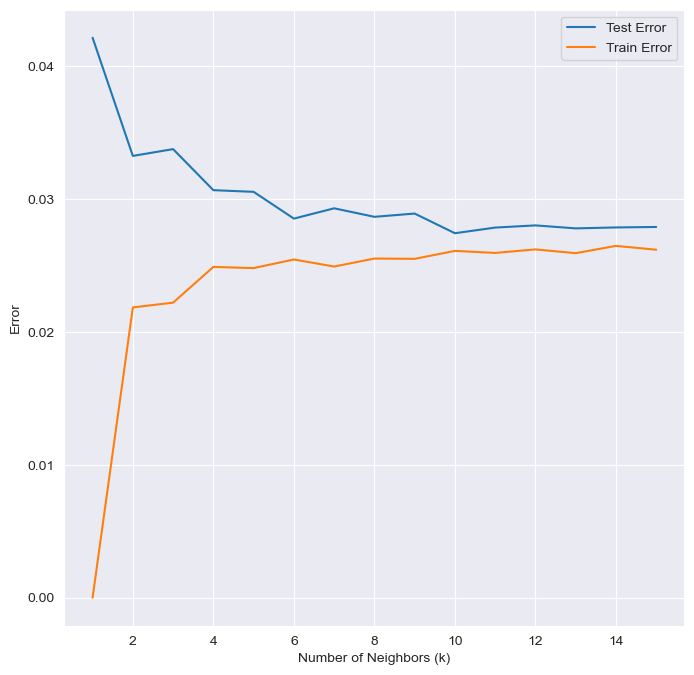

In [18]:
# Plotting k vs train and test error
plt.figure(figsize = (8, 8))
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error")
plt.plot(kl, vl, label = 'Test Error')
plt.plot(kl, v2, label = 'Train Error')
plt.legend()
plt.show()

**Observation**: 

- From the above graph, we can say that K=15 gives us the generalized model with very similar train and test errors.